# Stochastic Gradient Descent

Definitions:

`Stochastic`: Randomized

`Gradient`: The magnitude of the loss at each iteration

`Descent`: Iteratively moving to our solution in the direction opposite to the gradient

`Stochastic Gradient Descent`: Technique for minimizing a loss function by sampling random `training points` in a `dataset` and calculating a gradient on those random points rather than the entire dataset.

- Benefits:
	- Faster Computation
	- Removes barrier to non-differentiable functions

___
## The Average Problem
- In this notebook, we're exploring how to find the `average of a list of numbers`
Steps:
1. `Stochastic`: We randomly sample a datapoint in the list
2. `Gradient`: Loss = distance of an `iterative guess` from the randomly sampled point
3. `Descent`: At each iteration, we move our guess in the opposite direction of the loss

Analogy:
- We're pushing a boulder down a path towards a destination (say a city)
- At each step we can know the distance/direction of a random house in the city
- The loss function will give us how far away we are from the city and which direction
- We will move our guess by a small amount of this loss (subtract our current distance by a small amount from that house)
___
## Loss Function
- We define the city as the entire `list of numbers` and a city as a `random sampling` of the list
- Steps to calculate the step at each epoch/iteration
```
1) Loss = Guess - random sampled point
2) Next Guess/Step = Guess(current location) - learning_rate * loss
3) Repeat steps 1 and 2 with Guess being Next Guess each epoch
```
- Over many iterations, we will eventually descend to the correct value
- This specific model is impacted by `learning_rate` and `num_epochs` which you can see in the `moderate` and `large` range data examples
___

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [40]:
def get_loss(guess: float, dataset: list) -> float:
  """
  guess: a starting point on where to approach true average
  dataset: a list representing all the numbers in the dataset
  """
  return guess - np.random.choice(dataset, 1)

def get_next_step(guess: float, loss: float, learning_rate: float) -> float:
  """
  returns the next guess as a small step towards minimizing the loss
  Since `loss` is defined as `magnitude the guess if off from true average` or `guess - random datapoint`
  """
  return (float) (guess - loss * learning_rate)

In [41]:
def get_average(dataset: list) -> float:
  """Helper function for actually finding the average of the dataset"""
  sum_total = sum([num for num in dataset])
  average = float(sum_total) / len(dataset)
  return average

def get_distance_from_avg(guess: float, avg: float) -> float:
  """Returns te distance of the guess from an average value"""
  return abs(guess - avg)

In [42]:
def plot_descent(descent_at_epochs: list, print_epochs: bool = False,INITIAL_GUESS: float = None, DATASET: list = None) -> None:
  # X Label Range, subtract 1 since we add initial guess at the 0th epoch
  num_epochs = len(descent_at_epochs)-1

  # Setup the graph axis
  title = f"Stochastic Gradient Descent with {num_epochs} epochs | Initial Guess: {INITIAL_GUESS } | Dataset: {DATASET}" if INITIAL_GUESS and DATASET else f"Stochastic Gradient Descent over {num_epochs} epochs"
  plt.title(title)
  plt.xlabel("Epoch")
  plt.ylabel("Guess")

  # Plot each guess
  plt.plot(descent_at_epochs)

  # Print out the table if desired
  if(print_epochs and DATASET):

    # Generate data for the guess/absolute distance from avg at each iteration
    headers = ["Epoch", "Guess", "Dist. from Avg"]
    avg = get_average(DATASET)
    all_epoch_guess_pairs = np.array([[epoch, guess, get_distance_from_avg(guess, avg)] for epoch, guess in enumerate(descent_at_epochs)], dtype=object)

    # Format data into table format
    interval_pairs = decimate_array(all_epoch_guess_pairs, interval=10)
    table = tabulate(interval_pairs, headers, tablefmt="grid")

    # Display Data
    print(f"Average: {avg}")
    print(table)

def decimate_array(long_list: list, interval: int = 10) -> list:
  """Returns every `interval` index of the input list"""
  short_list = []
  for i, val in enumerate(long_list):
    if(i % interval == 0):
      short_list.append(val)
  return short_list

In [43]:
# new estimate = current estimate - (0.1)loss (which is just guess - datapoint)
def calculate_SGD(INITIAL_GUESS: float, INPUT_DATA: list, num_epochs: int, learning_rate: float) -> list:

  # Start the descent from an arbitrary `initial condition`
  guess = INITIAL_GUESS
  guesses = [INITIAL_GUESS]

  # Descend by the gradient at each step
  for epoch in range(num_epochs):
    loss = get_loss(guess, INPUT_DATA)
    guess = get_next_step(guess, loss, learning_rate)
    guesses.append(guess)

  # return the history of descent to be plotted
  return guesses

In [44]:
def SGD(INITIAL_GUESS: float, INPUT_DATA: list, num_epochs: int = 5, learning_rate: float = 0.1, print_epochs: bool = True) -> None:
  # Step 1) Calcualte Gradient Descent
  descent_history: list = calculate_SGD(
      INITIAL_GUESS=INITIAL_GUESS,
      INPUT_DATA=INPUT_DATA,
      num_epochs=num_epochs,
      learning_rate=learning_rate,
  )

  # Step 2) Plot those values
  plot_descent(
      descent_at_epochs=descent_history,
      print_epochs=print_epochs,
      INITIAL_GUESS=INITIAL_GUESS,
      DATASET=INPUT_DATA
  )

Average: 4.0
+---------+----------+------------------+
|   Epoch |    Guess |   Dist. from Avg |
+=========+==========+==================+
|       0 | 10       |        6         |
+---------+----------+------------------+
|      10 |  6.18484 |        2.18484   |
+---------+----------+------------------+
|      20 |  4.91272 |        0.91272   |
+---------+----------+------------------+
|      30 |  4.11182 |        0.111822  |
+---------+----------+------------------+
|      40 |  3.95806 |        0.0419362 |
+---------+----------+------------------+
|      50 |  4.03546 |        0.0354596 |
+---------+----------+------------------+


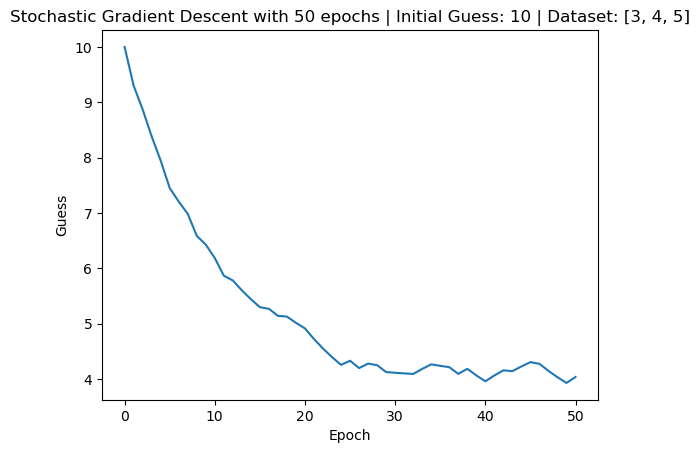

In [45]:
# Small Range Data
SGD(INITIAL_GUESS=10, INPUT_DATA=[3,4,5], num_epochs=50, learning_rate=0.1)

Average: 10.5
+---------+----------+------------------+
|   Epoch |    Guess |   Dist. from Avg |
+=========+==========+==================+
|       0 | 10       |         0.5      |
+---------+----------+------------------+
|      10 |  9.69865 |         0.801346 |
+---------+----------+------------------+
|      20 |  7.12126 |         3.37874  |
+---------+----------+------------------+
|      30 | 10.8935  |         0.393496 |
+---------+----------+------------------+
|      40 | 11.4239  |         0.923902 |
+---------+----------+------------------+
|      50 |  9.64887 |         0.851127 |
+---------+----------+------------------+


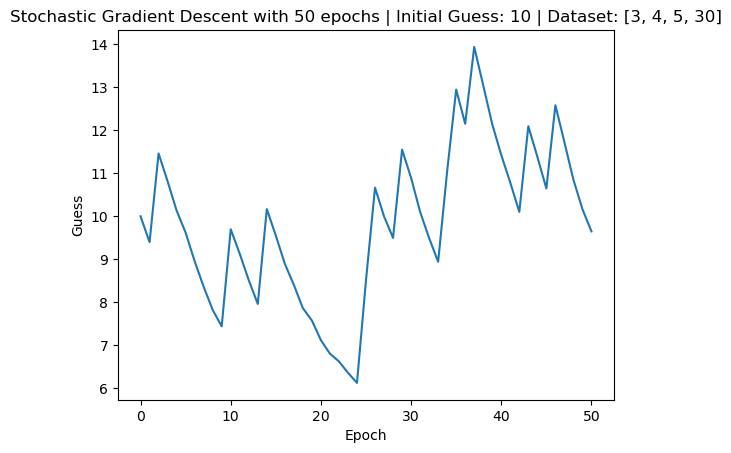

In [46]:
# Medium Range Data
SGD(INITIAL_GUESS=10, INPUT_DATA=[3,4,5,30], num_epochs=50, learning_rate=0.1)

Average: 78.0
+---------+---------+------------------+
|   Epoch |   Guess |   Dist. from Avg |
+=========+=========+==================+
|       0 | 10      |        68        |
+---------+---------+------------------+
|      10 | 20.6517 |        57.3483   |
+---------+---------+------------------+
|      20 | 27.5754 |        50.4246   |
+---------+---------+------------------+
|      30 | 27.9777 |        50.0223   |
+---------+---------+------------------+
|      40 | 28.3801 |        49.6199   |
+---------+---------+------------------+
|      50 | 31.6992 |        46.3008   |
+---------+---------+------------------+
|      60 | 31.9809 |        46.0191   |
+---------+---------+------------------+
|      70 | 37.9524 |        40.0476   |
+---------+---------+------------------+
|      80 | 40.4803 |        37.5197   |
+---------+---------+------------------+
|      90 | 39.8357 |        38.1643   |
+---------+---------+------------------+
|     100 | 39.3104 |        38.6896   |
+-

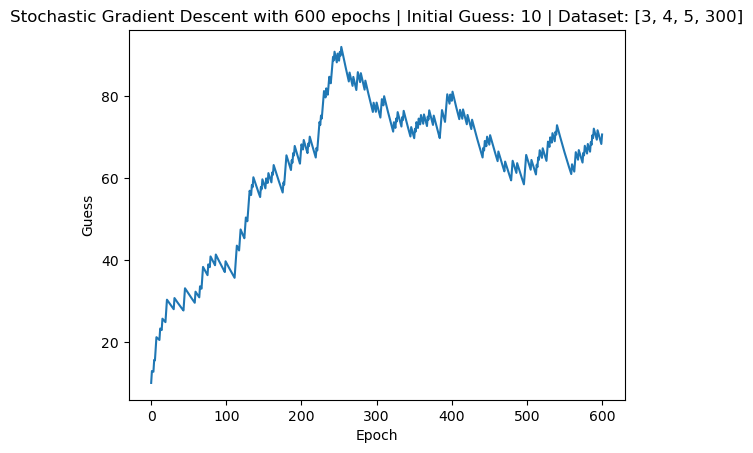

In [47]:
# Large Range Data
SGD(INITIAL_GUESS=10, INPUT_DATA=[3,4,5,300], num_epochs=600, learning_rate=0.01)